<a href="https://colab.research.google.com/github/myschl/ML-DL/blob/master/MNIST_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import normalize
from keras import regularizers
import pandas as pd
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [2]:
# mnist_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
# mnist_test = pd.read_csv('/content/sample_data/mnist_test.csv')

(X_train, y_train),(X_valid, y_valid) = mnist.load_data()

X_train_r = X_train.copy()
y_train_r = y_train.copy()

# Tensors Normalization
X_train_r = normalize(X_train_r)
y_train_r = normalize(y_train_r)

X_valid = normalize(X_valid)
y_valid = normalize(y_valid)

# X_train_r = np.asarray(X_train_r)
# y_train_r = np.asarray(y_train_r)

# X_valid = np.asarray(X_valid).astype('float32')
# y_valid = np.asarray(y_valid).astype('float32')

11493376/11490434 [==============================] - 21s 2us/step


In [0]:
X_valid[50]

In [0]:
# X_train_r = X_train_r.reshape((60000, 28 * 28))
# X_train_r = X_train_r.astype('float32')/255

# y_train_r = y_train_r.reshape((10000, 28 * 28))
# y_train_r = y_train_r.astype('float32')/255


# scaler = StandardScaler().fit(X_train_r)
# X_train_s = scaler.fit_transform(X_train_r)

# scaler2 = StandardScaler().fit(y_train_r)
# y_train_s = scaler2.fit_transform(y_train_r)


In [0]:
X_train_r.shape

(60000, 28, 28)

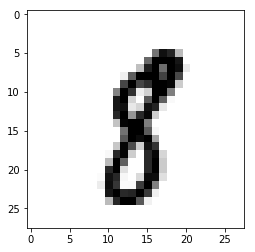

In [0]:
plt.imshow(X_train[300], cmap = plt.cm.binary)
plt.show()

In [3]:
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(10, activation = 'relu', input_shape = (28 * 28, )))
# model.add(layers.Dense(8, activation = 'relu'))
# model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax')) 

model.compile(optimizer = 'rmsprop' ,
             loss = 'categorical_crossentropy',
             matrics = ['accuracy'])

history = model.fit(X_train_r, y_train_r.T, 
                   epochs = 10, 
                   batch_size = 100,
                   validation_data=(X_valid, y_valid.T))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.1233 - val_loss: 0.3103
Epoch 2/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1260 - val_loss: 0.3035
Epoch 3/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1238 - val_loss: 0.3041
Epoch 4/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.1216 - val_loss: 0.2966
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1189 - val_loss: 0.2865
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1157 - val_loss: 0.2808
Epoch 7/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1123 - val_loss: 0.2693
Epoch 8/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0

In [0]:
history_keys = history.history
history_keys.keys()

dict_keys(['loss', 'val_loss'])

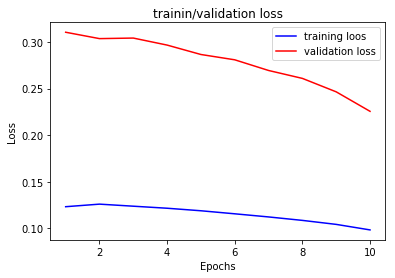

In [4]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 10 + 1)
plt.plot(epochs, loss_values, 'b-', label='training loos')
plt.plot(epochs, val_loss_values, 'r-', label='validation loss')
plt.title('trainin/validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
model2 = models.Sequential()
model2.add(layers.Flatten())
model2.add(layers.Dense(10, kernel_regularizer = regularizers.l1(0.01) , activation = 'relu', input_shape = (28 * 28, )))
# model2.add(layers.Dense(8, activation = 'relu'))
# model2.add(layers.Dense(16, activation = 'relu'))
model2.add(layers.Dense(10, activation = 'softmax')) 

model2.compile(optimizer = 'rmsprop' ,
             loss = 'categorical_crossentropy',
             matrics = ['accuracy'])

history2 = model.fit(X_train_r, y_train_r.T, 
                   epochs = 10, 
                   batch_size = 100,
                   validation_data=(X_valid, y_valid.T))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0885 - val_loss: 0.2043
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0827 - val_loss: 0.2025
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0845 - val_loss: 0.2100
Epoch 4/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0866 - val_loss: 0.2154
Epoch 5/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0888 - val_loss: 0.2224
Epoch 6/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0911 - val_loss: 0.2262
Epoch 7/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0933 - val_loss: 0.2339
Epoch 8/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0953 - val_loss: 0.2304
Epoch 9/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0978 - val_

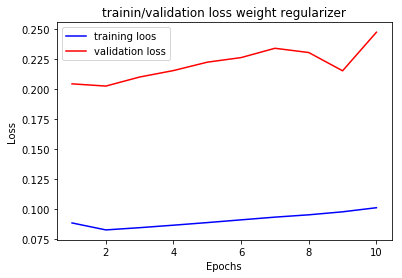

In [38]:
history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

epochs = range(1, 10 + 1)
plt.plot(epochs, loss_values2, 'b-', label='training loos')
plt.plot(epochs, val_loss_values2, 'r-', label='validation loss')
plt.title('trainin/validation loss weight regularizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
model3 = models.Sequential()
model3.add(layers.Flatten())
model3.add(layers.Dense(32, activation = 'relu', input_shape = (28 * 28, )))
model3.add(layers.Dropout(0.5))
# model3.add(layers.Dense(16, activation = 'relu'))
# model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(10, activation = 'softmax')) 

model3.compile(optimizer = 'rmsprop' ,
             loss = 'categorical_crossentropy',
             matrics = ['accuracy'])

history3 = model.fit(X_train_r, y_train_r.T, 
                   epochs = 10, 
                   batch_size = 100,
                   validation_data=(X_valid, y_valid.T))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 1.8158 - val_loss: 4.4753
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 1.8239 - val_loss: 4.4320
Epoch 3/10
60000/60000 [==============================] - 2s 28us/sample - loss: 1.8317 - val_loss: 4.5149
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 1.8397 - val_loss: 4.4821
Epoch 5/10
60000/60000 [==============================] - 2s 27us/sample - loss: 1.8478 - val_loss: 4.5515
Epoch 6/10
60000/60000 [==============================] - 2s 28us/sample - loss: 1.8557 - val_loss: 4.4468
Epoch 7/10
60000/60000 [==============================] - 2s 27us/sample - loss: 1.8634 - val_loss: 4.4779
Epoch 8/10
60000/60000 [==============================] - 2s 27us/sample - loss: 1.8712 - val_loss: 4.5890
Epoch 9/10
60000/60000 [==============================] - 2s 28us/sample - loss: 1.8793 - val_

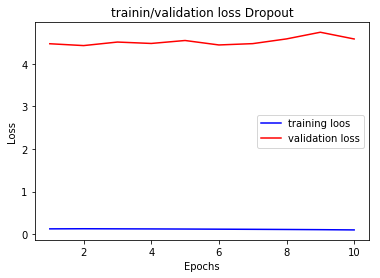

In [36]:
history_dict3 = history3.history
loss_values3 = history_dict['loss']
val_loss_values3 = history_dict3['val_loss']

epochs = range(1, 10 + 1)
plt.plot(epochs, loss_values3, 'b-', label='training loos')
plt.plot(epochs, val_loss_values3, 'r-', label='validation loss')
plt.title('trainin/validation loss Dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

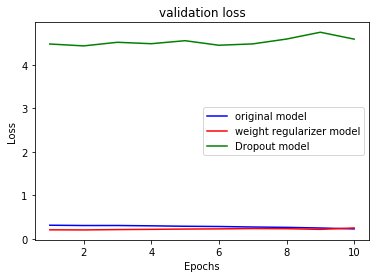

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

history_dict2 = history2.history
loss_values2 = history_dict2['loss']
val_loss_values2 = history_dict2['val_loss']

history_dict3 = history3.history
loss_values3 = history_dict3['loss']
val_loss_values3 = history_dict3['val_loss']

epochs = range(1, 10 + 1)
plt.plot(epochs, val_loss_values, 'b-', label='original model')
plt.plot(epochs, val_loss_values2, 'r-', label='weight regularizer model')
plt.plot(epochs, val_loss_values3, 'g-', label='Dropout model')
plt.title('validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
scores.history

{'loss': [0.10740356841087341, 0.11607370029687882]}

In [0]:
y_valid = y_valid.T
y_valid.shape

(10000, 1)

In [0]:
loss = model.evaluate(X_valid, y_valid)

print( loss)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2018
0.20179340181350708
